# Assignment for DV2
---

### Import Libraries
---

In [9]:
from dash import Dash
from dash import html, dcc 
from dash import callback, Output, Input
import plotly.express as px
import pandas as pd
import numpy as np
from tqdm import tqdm

In [10]:
def process_data(file_name, chunk_size=10000):
    
    # Read CSV file in chunks
    iter_csv = pd.read_csv(file_name, iterator=True, chunksize=chunk_size)
    data = pd.concat([chunk for chunk in tqdm(iter_csv, desc=f"Processing {file_name}")])

    data.columns = data.columns.str.replace(' ', '_')
    data['OBSERVATION_COUNT'] = pd.to_numeric(data['OBSERVATION_COUNT'].str.replace('X', '0').str.strip())
    data['OBSERVATION_DATE'] = pd.to_datetime(data['OBSERVATION_DATE'])
    data['YEAR'] = data['OBSERVATION_DATE'].dt.year
    data['MONTH'] = data['OBSERVATION_DATE'].dt.strftime('%B')
    data['year_month'] = data['OBSERVATION_DATE'].dt.strftime('%Y-%m')

    # columns to drop
    columns_to_drop = ['LAST_EDITED_DATE', 'TAXONOMIC_ORDER', 'CATEGORY', 'TAXON_CONCEPT_ID',
                       'SUBSPECIES_COMMON_NAME', 'SUBSPECIES_SCIENTIFIC_NAME', 'EXOTIC_CODE',
                       'BREEDING_CODE', 'BREEDING_CATEGORY', 'BEHAVIOR_CODE', 'AGE/SEX', 'COUNTRY', 
                       'COUNTRY_CODE', 'STATE_CODE', 'COUNTY_CODE', 'IBA_CODE', 'BCR_CODE',
                       'ATLAS_BLOCK', 'LOCALITY', 'LOCALITY_ID', 'USFWS_CODE', 'LOCALITY_TYPE',
                       'SAMPLING_EVENT_IDENTIFIER', 'PROTOCOL_TYPE', 'PROTOCOL_CODE', 'PROJECT_CODE',
                       'EFFORT_AREA_HA', 'ALL_SPECIES_REPORTED', 'GROUP_IDENTIFIER', 'HAS_MEDIA', 
                       'APPROVED', 'REVIEWED', 'REASON', 'TRIP_COMMENTS', 'SPECIES_COMMENTS', 
                       'Unnamed:_49']

    data = data.drop(columns=columns_to_drop, errors='ignore')

    return data

NM_data = process_data('NM.csv')
OK_data = process_data('OK.csv')


Processing NM.csv: 468it [00:49,  9.55it/s]
Processing OK.csv: 214it [00:23,  9.02it/s]


In [12]:
NM_OK_Data= pd.concat([NM_data, OK_data], ignore_index=True)

In [14]:
NM_OK_Data.columns

Index(['GLOBAL_UNIQUE_IDENTIFIER', 'COMMON_NAME', 'SCIENTIFIC_NAME',
       'OBSERVATION_COUNT', 'STATE', 'COUNTY', 'LATITUDE', 'LONGITUDE',
       'OBSERVATION_DATE', 'TIME_OBSERVATIONS_STARTED', 'OBSERVER_ID',
       'DURATION_MINUTES', 'EFFORT_DISTANCE_KM', 'NUMBER_OBSERVERS', 'YEAR',
       'MONTH', 'year_month'],
      dtype='object')

In [15]:
themes = [
    {'label': 'Plotly', 'value': 'plotly'},
    {'label': 'Seaborn', 'value': 'seaborn'},
    {'label': 'Simple White', 'value': 'simple_white'},
    # Add more themes as required
]

In [16]:
# Group by 'COMMON_NAME' and sum 'OBSERVATION_COUNT'
grouped_df_OK = OK_data.groupby('COMMON_NAME')['OBSERVATION_COUNT'].sum().reset_index()

# Sort by 'OBSERVATION_COUNT' in descending order and select the top 10
top10_birds_OK = grouped_df_OK.sort_values(by='OBSERVATION_COUNT', ascending=False).head(10)

# Display the top 10 birds
print(top10_birds_OK)

              COMMON_NAME  OBSERVATION_COUNT
372  Red-winged Blackbird            5078263
404        Sandhill Crane            4149907
98           Canada Goose            2632022
375      Ring-billed Gull            2122128
292               Mallard            2068447
184       Franklin's Gull            1892539
176     European Starling            1815431
15         American Robin            1664175
424            Snow Goose            1455785
134        Common Grackle            1103828


In [17]:
# Group by 'COMMON_NAME' and sum 'OBSERVATION_COUNT'
grouped_df_NM = NM_data.groupby('COMMON_NAME')['OBSERVATION_COUNT'].sum().reset_index()

# Sort by 'OBSERVATION_COUNT' in descending order and select the top 10
top10_birds_NM = grouped_df_NM.sort_values(by='OBSERVATION_COUNT', ascending=False).head(10)

# Display the top 10 birds
print(top10_birds_NM)

              COMMON_NAME  OBSERVATION_COUNT
514            Snow Goose          9026677.0
489        Sandhill Crane          7460313.0
519     Snow/Ross's Goose          2785474.0
449  Red-winged Blackbird          2644739.0
129          Canada Goose          2343947.0
9           American Crow          1670784.0
384      Northern Pintail          1603250.0
8           American Coot          1570242.0
350               Mallard          1215682.0
222     European Starling          1158015.0


In [22]:
labels_ = {'COMMON_NAME': 'Common Name', 'OBSERVATION_COUNT': 'Observation Count'}
chart_size = {'height' : 650, 'width' : 650}

In [18]:
fig = px.bar(NM_OK_Data, x = 'YEAR', y = 'OBSERVATION_COUNT',
            title= 'Observation Count by Year',
            labels = labels_,
            text_auto = True)
fig.update_layout(title_x=0.5, plot_bgcolor = 'white')
fig.update_layout(chart_size, xaxis_title = None, template = 'simple_white')
fig.update_yaxes(visible = False)
fig.update_traces(texttemplate = '%{value:.3s}', textposition = 'outside')
fig


KeyboardInterrupt



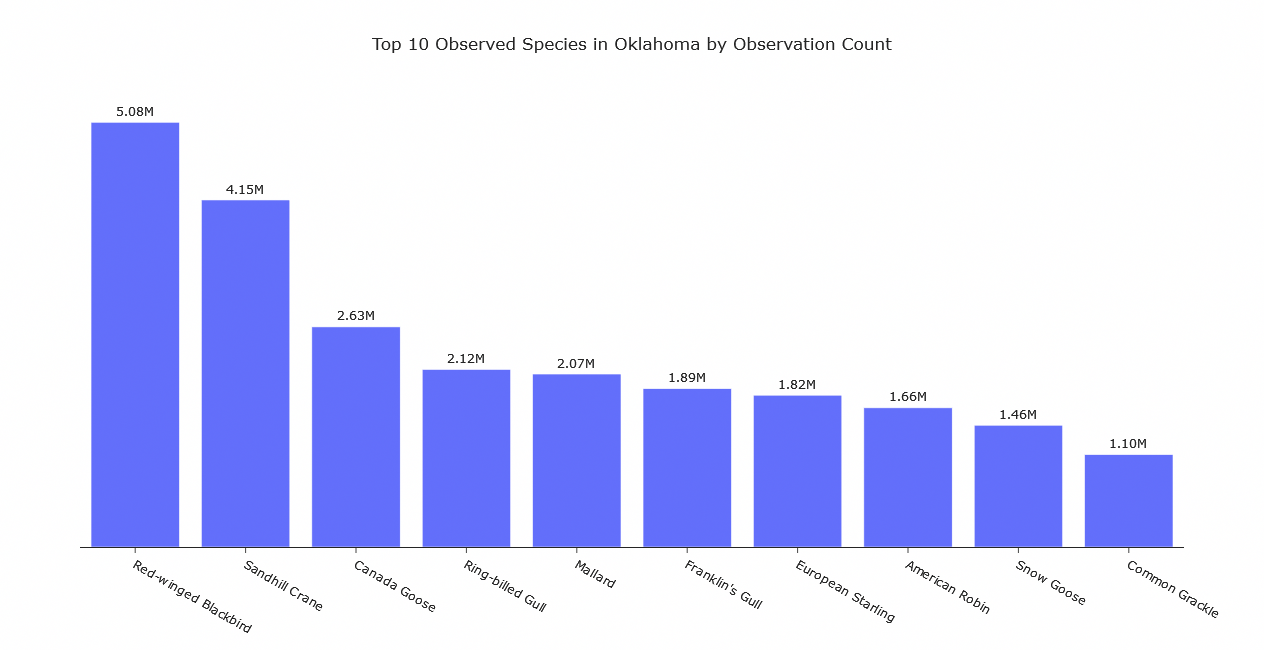

In [23]:
fig3 = px.bar(top10_birds_OK, x = 'COMMON_NAME', y = 'OBSERVATION_COUNT',
            title= 'Top 10 Observed Species in Oklahoma by Observation Count',
            labels = labels_,
            text_auto = True)
fig3.update_layout(title_x=0.5, plot_bgcolor = 'white')
fig3.update_layout(chart_size, xaxis_title = None, template = 'simple_white')
fig3.update_yaxes(visible = False)
fig3.update_traces(texttemplate = '%{value:.3s}', textposition = 'outside')
fig3

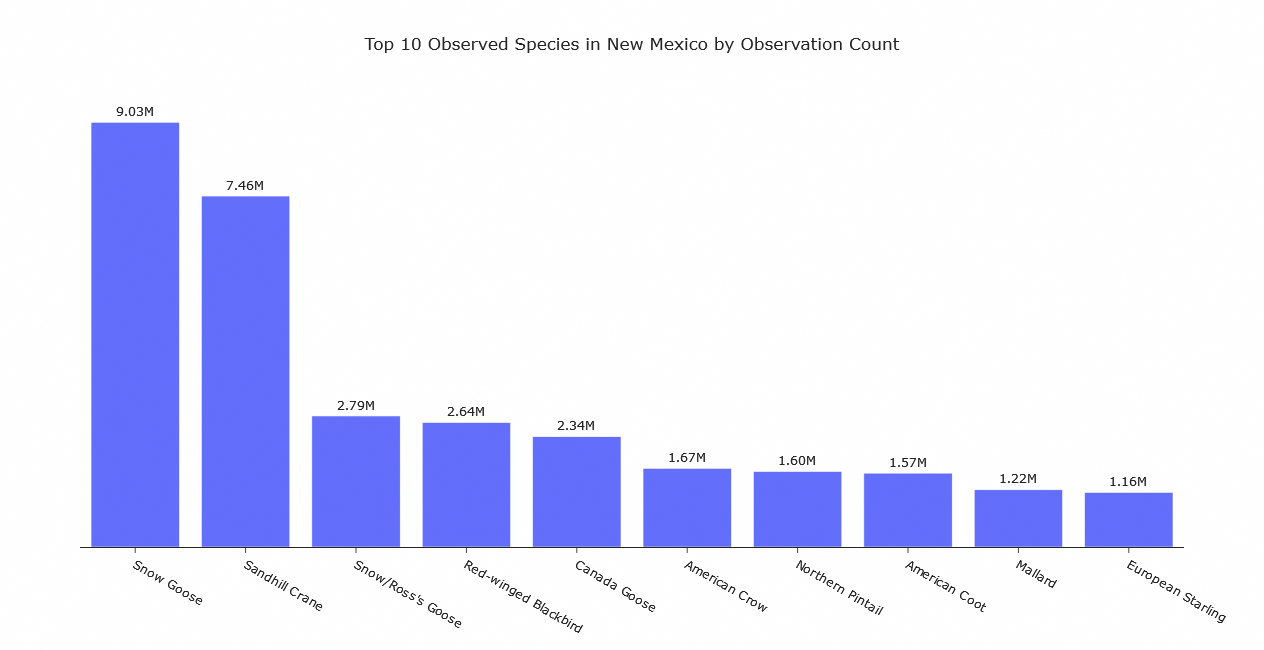

In [24]:
fig4 = px.bar(top10_birds_NM, x = 'COMMON_NAME', y = 'OBSERVATION_COUNT',
            title= 'Top 10 Observed Species in New Mexico by Observation Count',
            labels = labels_,
            text_auto = True)
fig4.update_layout(title_x=0.5, plot_bgcolor = 'white')
fig4.update_layout(chart_size, xaxis_title = None, template = 'simple_white')
fig4.update_yaxes(visible = False)
fig4.update_traces(texttemplate = '%{value:.3s}', textposition = 'outside')
fig4

In [16]:
app = Dash(__name__)

df = NM_OK_Data

# creating a variable for the list of countries

SPECIES = np.sort(df.COMMON_NAME.unique())
YEAR = [{'label': year, 'value': year} for year in df.YEAR.unique()]

app.layout = html.Div([
    html.H1(children='New Mexico and Oklahoma Observations', style={'textAlign':'center'}),
    
    # dropdown for theme selection
    html.Label('Select the theme of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id = 'dropdown', options = themes, value = 'plotly'),
    
    # dropdown for species selection
    html.Label('Select the species to compare:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id = 'dropdown2', options = SPECIES, value = 'Red-winged Blackbird', multi = True),
    
    # dropdown for year
    html.Label('Select the Year:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Dropdown(id = 'dropdown3', options = YEAR, value = '2016', multi = True),
    
    # adding the label and the slider for changing the width
    html.Label('Select the width of the chart:', style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Slider(700, 900, 100, value = 800, id = 'slider'),
    
    # adding the graphs
    html.Div(dcc.Graph(id = 'graph'), style = {'display': 'inline-block', 'width': '50%'}),
    html.Div(dcc.Graph(id = 'graph2'), style = {'display': 'inline-block', 'width': '50%'}),
    html.Div(dcc.Graph(id = 'graph3'), style = {'display': 'inline-block', 'width': '50%'}),
    html.Div(dcc.Graph(id = 'graph4'), style = {'display': 'inline-block', 'width': '50%'})
])

# a second input comes to the callback
@app.callback(
    Output('graph', 'figure'), 
    # extending the callback with the second chart
    Output('graph2', 'figure'),
    Output('graph3', 'figure'),
    Output('graph4', 'figure'),
    Input('dropdown', 'value'),
    Input('dropdown2', 'value'),
    Input('dropdown3', 'value'),
    Input('slider', 'value'))

def update_chart(template_name, SPECIES_list, YEAR_list, width_):
    # we can reference our variables using @
    df = NM_OK_Data.query("COMMON_NAME in @SPECIES_list and YEAR in @YEAR_list")

   
    fig3 = px.bar(top10_birds_OK, x = 'COMMON_NAME', y = 'OBSERVATION_COUNT',
            title= 'Top 10 Observed Species in Oklahoma by Observation Count',
            labels = labels_,
            text_auto = True)
    fig3.update_layout(title_x=0.5, plot_bgcolor = 'white')
    fig3.update_layout(chart_size, xaxis_title = None, template = 'simple_white')
    fig3.update_yaxes(visible = False)
    fig3.update_traces(texttemplate = '%{value:.3s}', textposition = 'outside')
    
    fig4 = px.bar(top10_birds_NM, x = 'COMMON_NAME', y = 'OBSERVATION_COUNT',
            title= 'Top 10 Observed Species in New Mexico by Observation Count',
            labels = labels_,
            text_auto = True)
    fig4.update_layout(title_x=0.5, plot_bgcolor = 'white')
    fig4.update_layout(chart_size, xaxis_title = None, template = 'simple_white')
    fig4.update_yaxes(visible = False)
    fig4.update_traces(texttemplate = '%{value:.3s}', textposition = 'outside')
    
    fig = px.bar(df, x='year_month', y='OBSERVATION_COUNT',
                 title='Observation Count of ' + ''.join(SPECIES_list) + ' by State in ' + ''.join(map(str, YEAR_list)),
                 color='STATE', barmode='group')
    fig.update_layout(title_x=0.5, title_font_size = 15)
     
    
    fig2 = px.line(df, x='year_month', y='OBSERVATION_COUNT', color='STATE',
                   title='Observations by County ' + ''.join(SPECIES_list),
                   template=template_name, width=width_)
    fig2.update_layout(title_x=0.5, title_font_size=15)
    # returning 2 charts this time
    
    return fig3, fig4, fig, fig2

if __name__ == '__main__':
    app.run(debug=True)